# Example of TF-1 custom model

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build training data

In [2]:
n = 100
TRUE_W = 3.0
TRUE_b = 2.0

# random samples from normal distribution
np.random.seed(1)
r = np.random.normal(loc=0, scale=0.5, size=n)

# build data
inputs = np.random.normal(loc=0, scale=0.5, size=n)
outputs = TRUE_W * inputs + TRUE_b + r

# Define model

## Construct model

In [3]:
# graph input placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")

# trainable variables
W = tf.Variable(5.0, name="weight")
b = tf.Variable(0.0, name="bias")

# linear model
pred = tf.add(tf.multiply(X, W), b)

## Show model prediction before training

In [4]:
def plot_model(p):
    plt.scatter(inputs, outputs, c='black')
    plt.scatter(inputs, p, c='r')
    plt.show()

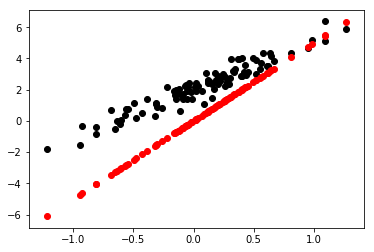

In [5]:
# create a session
untrained_sess = tf.Session()

# initialize variables
init = tf.global_variables_initializer()
untrained_sess.run(init)

untrained_pred = untrained_sess.run(pred, feed_dict={X: inputs, Y: outputs})
plot_model(untrained_pred)

# Train model

## Setup configurations

In [6]:
N_EPOCHS = 100
LEARNING_RATE = 0.1

# loss
loss = tf.reduce_mean(tf.square(pred - Y))

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

## Execute training

In [7]:
with tf.Session() as sess:

    sess.run(init)

    Ws, bs = [], []
    epochs = range(N_EPOCHS)
    for epoch in epochs:

        # get variables and loss before training of each epoch
        _W, _b = sess.run([W, b], feed_dict={X: inputs, Y: outputs})
        
        # record variables
        Ws.append(_W)
        bs.append(_b)
        
        # train
        for (x, y) in zip(inputs, outputs):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
    trained_pred = sess.run(pred, feed_dict={X: inputs, Y: outputs})

## Show model prediction after training

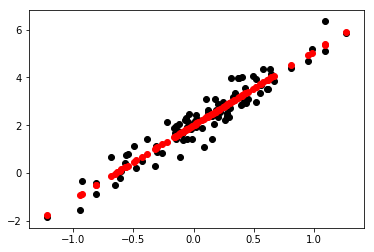

In [8]:
plot_model(trained_pred)